<a href="https://colab.research.google.com/github/BonfaDScience/BonfaDScience/blob/main/DIO_Metricas_de_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [9]:
%load_ext tensorboard

In [10]:
logdir = 'log'

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Redimensionar e normalizar
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

c
# Selecionar apenas classes 0 e 1
classes_filtradas = [0, 1]
train_filter = np.isin(train_labels, classes_filtradas)
test_filter = np.isin(test_labels, classes_filtradas)

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

print(f"Número de imagens de treino: {len(train_images)}")
print(f"Número de imagens de teste: {len(test_images)}")

Número de imagens de treino: 12665
Número de imagens de teste: 2115


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x=train_images, y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels),
          callbacks=[tensorboard_callback])


Epoch 1/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9757 - loss: 0.1564 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 2/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9985 - loss: 0.0041 - val_accuracy: 0.9986 - val_loss: 0.0049
Epoch 3/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 4/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9990 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 9.3292e-04
Epoch 5/5
396/396 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.9999 - loss: 3.7365e-04 - val_accuracy: 0.9991 - val_loss: 0.0043


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

In [16]:
y_true = test_labels
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [25]:
print("Matriz de Confusão:")
for linha in conf_matrix:
    print(" ".join(map(str, linha)))

Matriz de Confusão:
979 1
0 1135


In [26]:
display(confi_matrix_df)

,Classe 0,Classe 1
Classe 0,979,1
Classe 1,0,1135


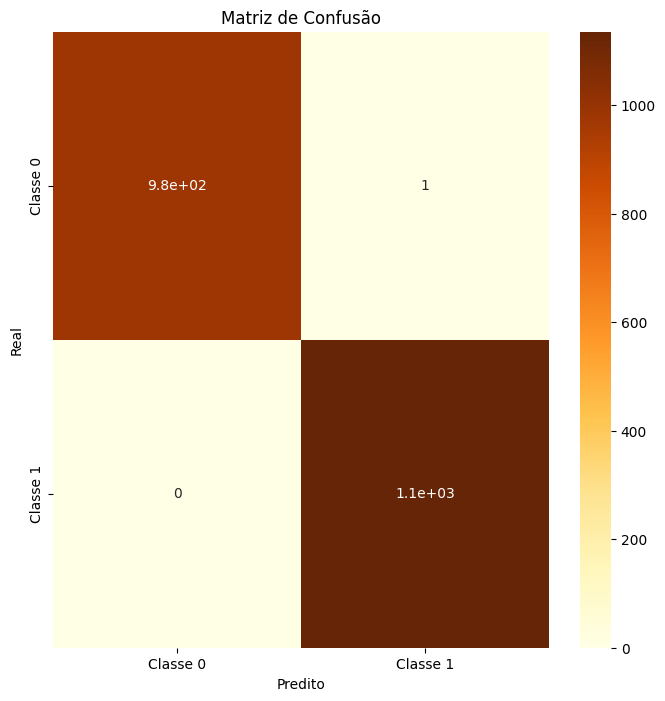

In [27]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

plt.figure(figsize=(8, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(conf_matrix_df, annot=True, cmap="YlOrBr")  # Adicione anotações e escolha um mapa de cores

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [28]:
for i in range(len(classes)):
    vp = conf_matrix_df.iloc[i, i]
    if i == 0:
      print(f"Verdadeiro Positivo (VP) para a {classes[i]}: {vp}")
    else:
      print(f"Verdadeiro Negativo (NP) para a {classes[i]}: {vp}")

Verdadeiro Positivo (VP) para a Classe 0: 979
Verdadeiro Negativo (NP) para a Classe 1: 1135


# Encontrando a Sensibilidade, Acurácia, F-Score e ROC


In [29]:
num_classes = len(classes)

In [30]:
VP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
VN = conf_matrix[1, 1]
print(f"Verdadeiros Positivos (VP): {VP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Falsos Negativos (FN): {FN}")

Verdadeiros Positivos (VP): 979
Falsos Positivos (FP): 1
Verdadeiros Negativos (VN): 1135
Falsos Negativos (FN): 0


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


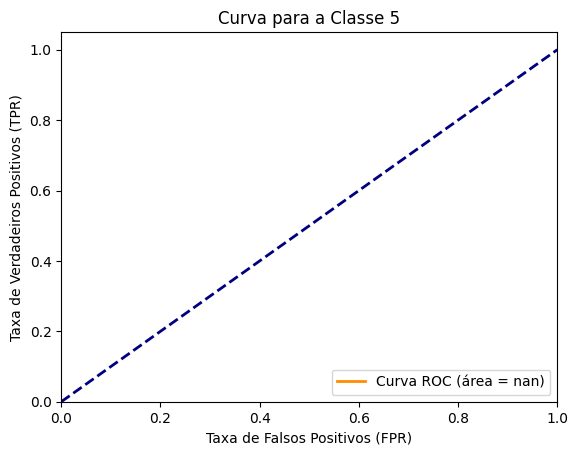

In [93]:
from sklearn.metrics import roc_curve, auc

pos_label = 5
y_true_binary = (y_true == pos_label).astype(int)
y_prob_positive = model.predict(test_images)[:, pos_label]

fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob_positive)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title(f'Curva para a Classe {pos_label}')
plt.legend(loc="lower right")
plt.show()

#////////////////////////////////////////////////////////////////////////////////

In [ ]:
from tensorflow import keras

file_writer = tf.summary.create_file_writer(logdir + '/cm')

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def log_confusion_matrix(epoch, logs):
  #global model1
  test_pred_raw = model1.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)
  con_mat = tf.math.confusion_matrix(test_labels, test_pred)
  con_mat = con_mat.numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
  con_mat_df = pd.DataFrame(con_mat_norm,
                            index=classes, columns=classes)
  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  import io # Import io module
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  image = tf.expand_dims(image, 0)
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)

logdir = 'logs/images'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)